In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import math 

In [159]:
df = pd.read_csv("GlobalWeatherRepository.csv")

In [160]:
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [100]:
print(df['temperature_celsius'].mean())
print(df['temperature_celsius'].max())
print(df['temperature_celsius'].min())
print(df['wind_kph'].mean())
print(df['wind_kph'].min())


24.823103984291905
49.2
-12.9
13.47679511303826
3.6


0.0


/var/folders/8y/srmhm4sj76n68gynpzqrnhm40000gn/T/ipykernel_902/2728956363.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['date'] = pd.to_datetime(country_data['last_updated'])
/var/folders/8y/srmhm4sj76n68gynpzqrnhm40000gn/T/ipykernel_902/2728956363.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['temp_change'] = country_data['temperature_celsius'].diff()


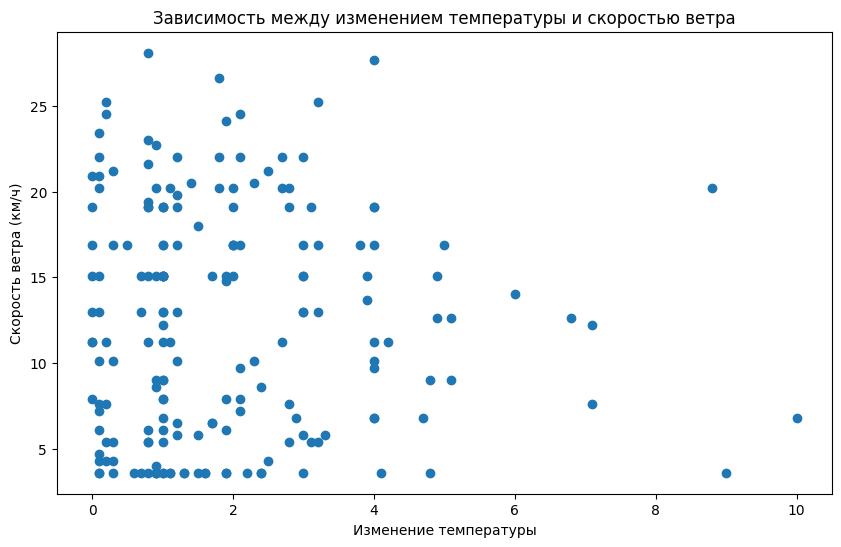

Коэффициент корреляции: 0.00


In [17]:



country_data = df[df['country'] == 'Albania']
country_data['date'] = pd.to_datetime(country_data['last_updated'])  
country_data['temp_change'] = country_data['temperature_celsius'].diff()


plt.figure(figsize=(10, 6))
plt.scatter(abs(country_data['temp_change']),country_data['wind_kph'],  )
plt.xlabel('Изменение температуры')
plt.ylabel('Скорость ветра (км/ч)')
plt.title('Зависимость между изменением температуры и скоростью ветра')
plt.show()


correlation = country_data['temp_change'].corr(country_data['wind_kph'])
print(f'Коэффициент корреляции: {correlation:.2f}')


Как видно из графика от изменения температуры за день не зависит скорость ветра.

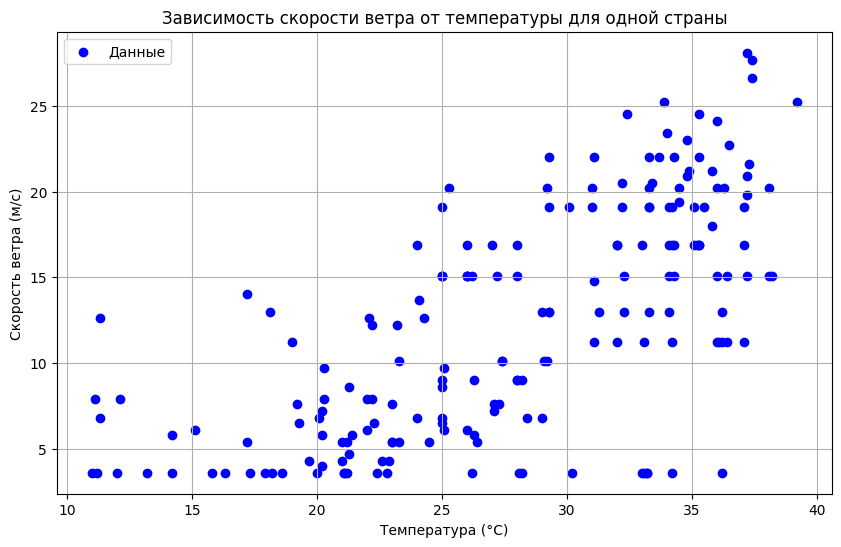


Коэффициент корреляции между скоростью ветра и температурой: 0.67


In [154]:


if 'last_updated' in df.columns:
    df['last_updated'] = pd.to_datetime(df['last_updated'])


def get_season(date):
    if date.month in [12, 1, 2]:
        return 'Зима'
    elif date.month in [3, 4, 5]:
        return 'Весна'
    elif date.month in [6, 7, 8]:
        return 'Лето'
    else:
        return 'Осень'


if 'last_updated' in df.columns:
    df['Сезон'] = df['last_updated'].apply(get_season)


country="Albania" # Замените  на нужную страну
country_data = df[df['country'] == country] 
#country_data=country_data[df['Сезон']=='Весна']
plt.figure(figsize=(10, 6))
plt.scatter(country_data['temperature_celsius'], country_data['wind_kph'], color='blue', label='Данные')
plt.title('Зависимость скорости ветра от температуры для одной страны')
plt.xlabel('Температура (°C)')
plt.ylabel('Скорость ветра (м/с)')
plt.grid()
plt.legend()
plt.show()


correlation = country_data['wind_kph'].corr(country_data['temperature_celsius'])
print(f"\nКоэффициент корреляции между скоростью ветра и температурой: {correlation:.2f}")


Из графика видно что при 25 градусах ветер в среднем слабый. При увелечении темпервтуры увеличивается скорость ветра 
Если взять Канаду или Россию, то мы можем предположить по графику что с уменьшением температуры с определенного момента скорость ветра также будет возрастать(но это нельзя увидеть при помощи этих данных, так как данных за зиму в этом Dataframe нет)

In [155]:

def wind_chill_index(temp, wind_speed):
    return 33 + (0.478 + 0.237 * math.sqrt(wind_speed) - 0.0124 * wind_speed) * (temp - 33)


df['Жесткость погоды'] = df.apply(lambda row: wind_chill_index(row['temperature_celsius'], row['wind_kph']), axis=1)

print(df.loc[df['Жесткость погоды'].idxmin()])

country                                    Mongolia
location_name                           Ulaanbaatar
latitude                                    47.9167
longitude                                  106.9167
timezone                           Asia/Ulaanbaatar
last_updated_epoch                       1730538900
last_updated                    2024-11-02 17:15:00
temperature_celsius                           -11.0
temperature_fahrenheit                         12.2
condition_text                        Partly Cloudy
wind_mph                                       12.5
wind_kph                                       20.2
wind_degree                                     337
wind_direction                                  NNW
pressure_mb                                  1033.0
pressure_in                                   30.49
precip_mm                                       0.0
precip_in                                       0.0
humidity                                         76
cloud       

Ветро-холодовой индекс — способ измерения жёсткости погоды, то есть субъективного ощущения человека при одновременном воздействии на него мороза и ветра.



In [ ]:
def heat_index(T, RH):
    return    -8.784695 + 1.61139411 * T + 2.338549 * RH - 0.14611605 * T * RH - 0.012308094 * T**2 - 0.016424414 * RH**2 + 0.002211703 * T**2 * RH + 0.00072546 * T * RH**2 - 0.000003582 * T**2 * RH**2
warm_data=df[df['temperature_celsius']>25]
df['heat index'] = warm_data.apply(lambda row: heat_index(row['temperature_celsius'], row['humidity']), axis=1)

print(warm_data.loc[warm_data['heat index'].idxmax()])



country                                    Qatar
location_name                               Doha
latitude                                   25.29
longitude                                  51.53
timezone                              Asia/Qatar
last_updated_epoch                    1724070600
last_updated                    2024-08-19 15:30
temperature_celsius                         38.1
temperature_fahrenheit                     100.6
condition_text                              Mist
wind_mph                                    12.5
wind_kph                                    20.2
wind_degree                                   20
wind_direction                               NNE
pressure_mb                                998.0
pressure_in                                29.47
precip_mm                                    0.0
precip_in                                    0.0
humidity                                      68
cloud                                          0
feels_like_celsius  

In [166]:
print(warm_data.loc[warm_data['heat index'].idxmin()])


country                                 Zimbabwe
location_name                             Harare
latitude                                  -17.82
longitude                                  31.04
timezone                           Africa/Harare
last_updated_epoch                    1720271700
last_updated                    2024-07-06 15:15
temperature_celsius                         25.2
temperature_fahrenheit                      77.4
condition_text                             Sunny
wind_mph                                     2.2
wind_kph                                     3.6
wind_degree                                  163
wind_direction                               SSE
pressure_mb                               1015.0
pressure_in                                29.97
precip_mm                                    0.0
precip_in                                    0.0
humidity                                       6
cloud                                          0
feels_like_celsius  

Тепловой индекс-это индекс, который сочетает в себе температуру воздуха и относительную влажность , чтобы посчитать  температуру, восприимчивую человеком.

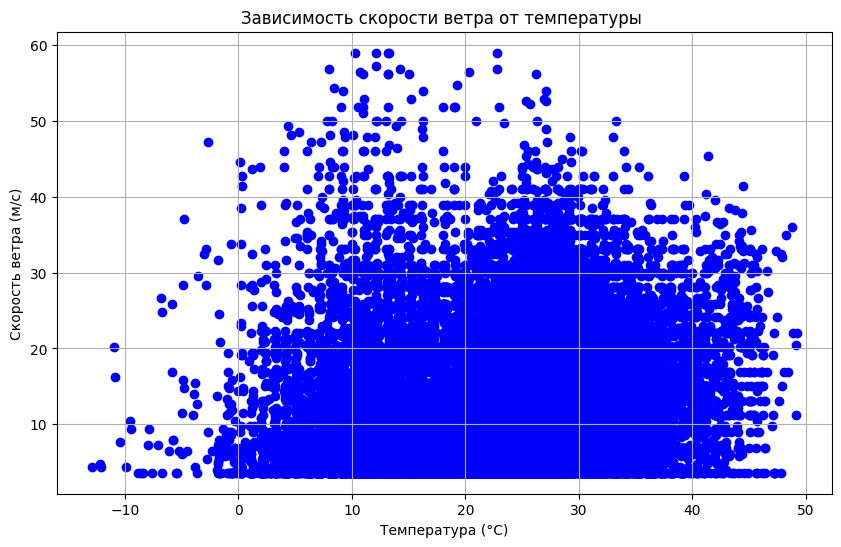

In [167]:


temp_min = 25
temp_max = 40
wind_speed_max = 60

filtered_df =df[df['wind_kph'] <= wind_speed_max]


plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['temperature_celsius'],filtered_df['wind_kph'], color='blue' )
plt.title('Зависимость скорости ветра от температуры ')
plt.xlabel('Температура (°C)')
plt.ylabel('Скорость ветра (м/с)')
plt.grid()
plt.show()
